## Wordnet Similarity

### Part - 1
   
    1. Find the top 5 occuring words(ignoring the stop words) and then find the words most similar to them. Use the extract given below.
    
    2. For any given word visualize how two words are similar

~~~~
The Supreme Court ruled last week in the case of Fane Lozman vs the City of Riviera Beach, Florida. They decided that Lozman’s 60-foot, two-story, motorless, rudderless floating home was not a boat or a vessel, and hence should not have been seized under maritime law and destroyed by the city.

With the line between house and boat a little bit clearer, reader Steve asked us to clarify something else: “What defines a boat, versus a ship?”

One of the quickest ways to reveal yourself as a landlubber is to refer to a ship as a boat, but there’s no absolute distinction between the two, and even experienced mariners rely on local custom and usage to differentiate them. 

Back in the Age of Sail, a ship was pretty well defined as a vessel with three or more square rigged masts. As different methods of power generation replaced wind and sail, the ships of old became more specifically known as “sailing ships,” and the usage of ship broadened to cover a wide, ill-defined variety of vessels. 

One thing that sets a ship apart from a boat is size. According the U.S. Naval Institute, a boat, generally speaking, is small enough to be carried aboard a larger vessel, and a vessel large enough to carry a smaller one is a ship. Or, as Steve says his Navy Lieutenant father put it to him, “You can put a boat on a ship, but you can’t put a ship on a boat.”

Now, this Naval convention is a good rule of thumb most of the time, but there are a few exceptions, among both naval and civilian vessels. Some yachts, ferries, tug boats, fishing boats, police boats, etc. can carry small lifeboats or dinghies, but they usually don’t graduate to ship status because of that. On the other hand, a large container ship or the USS Cole can be carried aboard an even bigger ship without getting demoted to a boat. 

The U.S. Navy seems to want to have it both ways with their submarines. One component of each vessel’s official name is USS—that is, United States Ship—but seamen, the Naval Institute says, usually refer to submarines in general as boats, regardless of size. 
~~~~


In [142]:
import nltk
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.corpus import stopwords
from collections import Counter
from itertools import product
from nltk.corpus import wordnet as wn
import networkx as nx
import pylab as plt
from nltk.stem.wordnet import WordNetLemmatizer
import matplotlib.pyplot as plt

# Part - 1

In [52]:
file = open('/home/anushya/Documents/us_navy.txt')
text = file.read()

In [227]:
#seperating the stop words
stop_words = set(stopwords.words("english"))
word_token = word_tokenize(text)
stop_words.update([',','.',':','?'])

In [158]:
#lemmantizing the text
filtered_sentence = []
for w in word_token:
    if w not in stop_words:
        filtered_sentence.append(wordnet_lemmatizer.lemmatize(w))
filtered_sentence

['The',
 'Supreme',
 'Court',
 'ruled',
 'last',
 'week',
 'case',
 'Fane',
 'Lozman',
 'v',
 'City',
 'Riviera',
 'Beach',
 'Florida',
 'They',
 'decided',
 'Lozman’s',
 '60-foot',
 'two-story',
 'motorless',
 'rudderless',
 'floating',
 'home',
 'boat',
 'vessel',
 'hence',
 'seized',
 'maritime',
 'law',
 'destroyed',
 'city',
 'With',
 'line',
 'house',
 'boat',
 'little',
 'bit',
 'clearer',
 'reader',
 'Steve',
 'asked',
 'u',
 'clarify',
 'something',
 'else',
 '“What',
 'defines',
 'boat',
 'versus',
 'ship',
 '”',
 'One',
 'quickest',
 'way',
 'reveal',
 'landlubber',
 'refer',
 'ship',
 'boat',
 'there’s',
 'absolute',
 'distinction',
 'two',
 'even',
 'experienced',
 'mariner',
 'rely',
 'local',
 'custom',
 'usage',
 'differentiate',
 'Back',
 'Age',
 'Sail',
 'ship',
 'pretty',
 'well',
 'defined',
 'vessel',
 'three',
 'square',
 'rigged',
 'mast',
 'As',
 'different',
 'method',
 'power',
 'generation',
 'replaced',
 'wind',
 'sail',
 'ship',
 'old',
 'became',
 'specifi

In [228]:
#Finding most common words in the document using Freqdist
wordnet_lemmatizer = WordNetLemmatizer()
fdist = nltk.FreqDist(filtered_sentence)
list_1 = []
for word, frequency in fdist.most_common(5):
    list_1.append(wordnet_lemmatizer.lemmatize(word))
list_1

['ship', 'boat', 'vessel', 'put', 'Naval']

In [229]:
#Finding common words using counter
common_words = Counter(filtered_sentence).most_common(5)
common_words

[('ship', 13), ('boat', 12), ('vessel', 6), ('put', 3), ('Naval', 3)]

In [219]:
synonyms = wn.synsets('ship')
synonyms

[Synset('ship.n.01'),
 Synset('transport.v.04'),
 Synset('ship.v.02'),
 Synset('embark.v.01'),
 Synset('ship.v.04'),
 Synset('ship.v.05')]

In [230]:
#Finding the similarity of common word with the words in content
for word1 in list_1:
    similarity = []
    for word2 in filtered_sentence:
        wordFromList1 = wn.synsets(word1)
        wordFromList2 = wn.synsets(word2)
        if wordFromList1 and wordFromList2:
            s = wordFromList1[0].wup_similarity(wordFromList2[0])
            if (s != None) & (s != 1):
                similarity.append((s,word1,word2))
    if(len(similarity)!= 0):
        print(max(similarity))

(0.9090909090909091, 'ship', 'yacht')
(0.9565217391304348, 'boat', 'ferry')
(0.7142857142857143, 'vessel', 'small')
(0.375, 'put', 'speaking')


# PART - 2

In [221]:
#Function for plotting graph
def closure_graph(synset, fn):
    seen = set()
    graph = nx.DiGraph()

    def recurse(s):
        if not s in seen:
            seen.add(s)
            graph.add_node(s.name())
            for s1 in fn(s):
                graph.add_node(s1.name())
                graph.add_edge(s.name(), s1.name())
                recurse(s1)

    recurse(synset)
    return graph

Visualizing similarities using networkx graph

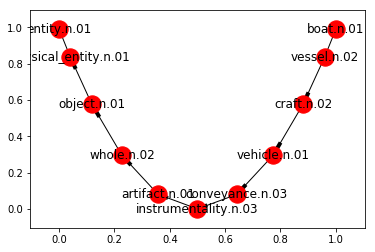

In [222]:
vessel_synset = wn.synset('boat.n.01')
graph = closure_graph(vessel_synset,lambda s: s.hypernyms())
nx.draw_networkx(graph, nx.spectral_layout(graph), with_labels = True)
plt.show()

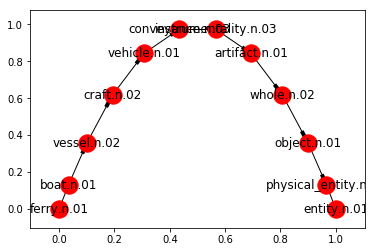

In [223]:
vessel_synset = wn.synset('ferry.n.01')
graph = closure_graph(vessel_synset,lambda s: s.hypernyms())
#nx.drawing.draw_graphviz(graph)
nx.draw_networkx(graph, nx.spectral_layout(graph), with_labels = True)
plt.show()